# Оптимизация инвестиционного портфеля: стохастический подход

## Введение

Оптимизация портфеля — это классическая задача финансовой математики, направленная на распределение капитала между различными активами для достижения оптимального баланса между ожидаемой доходностью и риском. Данная задача особенно интересна, так как учитывает неопределённость в доходности активов, что делает её подходящей для применения методов стохастической оптимизации, таких как метод Монте-Карло.


## Постановка задачи

Цель оптимизации портфеля заключается в нахождении такого распределения капитала между активами, которое минимизирует риск (измеряемый стандартным отклонением доходности) при заданной минимальной ожидаемой доходности или максимизирует доходность при ограничении на риск.

**Ключевая идея**:
- У нас есть $n$ активов, где $w_i $ — доля капитала, вложенная в $i$-й актив.
- Ограничения: $\sum_{i=1}^n w_i = 1$, $w_i \geq 0$.
- Ожидаемая доходность портфеля: $R(w) = \sum_{i=1}^n w_i \mu_i$, где $\mu_i$ — ожидаемая доходность $i$-ого актива.
- Риск портфеля: $\sigma(w) = \sqrt{w^T \Sigma w}$, где $\Sigma$ — ковариационная матрица доходностей.

**Задача**:
Минимизировать риск $\sigma(w)$ при ограничении на минимальную доходность $R(w) \geq R_{\text{min}}$.

**Стохастический аспект**:
Доходности $\mu_i$ и ковариации $\Sigma$ оцениваются на основе исторических данных, что вносит неопределённость. Метод Монте-Карло позволяет моделировать множество случайных портфелей для поиска оптимального решения.


## Пример задачи

Рассмотрим портфель из трёх активов (акции компаний A, B и C) со следующими характеристиками:
- Ожидаемая доходность: $ \mu_A = 0.12 $, $ \mu_B = 0.10 $, $ \mu_C = 0.08 $ (в год).
- Ковариационная матрица:

  $
  \Sigma = \begin{bmatrix}
  0.04 & 0.01 & 0.005 \\
  0.01 & 0.03 & 0.002 \\
  0.005 & 0.002 & 0.02
  \end{bmatrix}
  $
- Ограничения: $ \sum w_i = 1 $, $ w_i \geq 0 $, минимальная доходность $ R_{\text{min}} = 0.09 $.

**Цель**: Найти веса $ w = (w_A, w_B, w_C) $, минимизирующие риск при $ R(w) \geq 0.09 $.


## Решение с использованием метода Монте-Карло

Метод Монте-Карло генерирует множество случайных портфелей, оценивает их доходность и риск, а затем выбирает портфель с минимальным риском, удовлетворяющий заданным ограничениям.

Алгоритм:
1. Генерируем $N$ случайных векторов весов $w$, удовлетворяющих $\sum w_i = 1$, $w_i \geq 0$.
2. Для каждого портфеля вычисляем $R(w)$ и $\sigma(w)$.
3. Отбираем портфели с $R(w) \geq 0.09$ и выбираем тот, у которого минимальный риск.


Оптимальный портфель:
Веса: [0.1526926  0.31499053 0.53231686]
Доходность: 0.0924
Риск: 0.1096


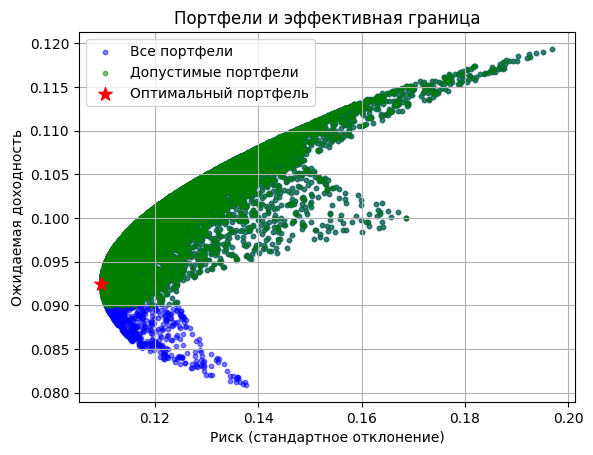

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
returns = np.array([0.12, 0.10, 0.08])  # Ожидаемая доходность активов
cov_matrix = np.array([[0.04, 0.01, 0.005],
                       [0.01, 0.03, 0.002],
                       [0.005, 0.002, 0.02]])  # Ковариационная матрица
min_return = 0.09  # Минимальная доходность
num_portfolios = 10000  # Количество случайных портфелей

# Функция для генерации случайных весов
def generate_weights(n):
    weights = np.random.random(n)
    weights /= np.sum(weights)  # Нормализация
    return weights

# Функция для вычисления доходности и риска портфеля
def portfolio_performance(weights, returns, cov_matrix):
    port_return = np.sum(returns * weights)
    port_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_risk

# Генерация портфелей
results = np.zeros((num_portfolios, 2))  # Массив для доходности и риска
weights_array = np.zeros((num_portfolios, len(returns)))  # Массив для весов

for i in range(num_portfolios):
    weights = generate_weights(len(returns))
    weights_array[i, :] = weights
    results[i, :] = portfolio_performance(weights, returns, cov_matrix)

# Фильтрация портфелей по минимальной доходности
valid_portfolios = results[:, 0] >= min_return
filtered_returns = results[valid_portfolios, 0]
filtered_risks = results[valid_portfolios, 1]
filtered_weights = weights_array[valid_portfolios]

# Нахождение портфеля с минимальным риском
if len(filtered_risks) > 0:
    min_risk_idx = np.argmin(filtered_risks)
    optimal_weights = filtered_weights[min_risk_idx]
    optimal_return = filtered_returns[min_risk_idx]
    optimal_risk = filtered_risks[min_risk_idx]
    print(f'Оптимальный портфель:\nВеса: {optimal_weights}\nДоходность: {optimal_return:.4f}\nРиск: {optimal_risk:.4f}')
else:
    print('Не найдено портфелей, удовлетворяющих заданной доходности.')

# Визуализация
plt.scatter(results[:, 1], results[:, 0], c='blue', s=10, alpha=0.5, label='Все портфели')
plt.scatter(filtered_risks, filtered_returns, c='green', s=10, alpha=0.5, label='Допустимые портфели')
if len(filtered_risks) > 0:
    plt.scatter(optimal_risk, optimal_return, c='red', s=100, marker='*', label='Оптимальный портфель')
plt.xlabel('Риск (стандартное отклонение)')
plt.ylabel('Ожидаемая доходность')
plt.title('Портфели и эффективная граница')
plt.legend()
plt.grid(True)
plt.show()


## Анализ результатов

Код выше генерирует 10,000 случайных портфелей, вычисляет их доходность и риск, фильтрует портфели по минимальной доходности (0.09) и выбирает тот, у которого минимальный риск. Результаты визуализируются в виде графика, где:
- Синие точки — все сгенерированные портфели.
- Зелёные точки — портфели, удовлетворяющие ограничению на доходность.
- Красная звезда — оптимальный портфель с минимальным риском.

Пример результата (зависит от случайной генерации):
- Веса: $w_A \approx 0.45$, $w_B \approx 0.30$, $w_C \approx 0.25$.
- Доходность: $R(w) \approx 0.103$.
- Риск: $\sigma(w) \approx 0.132$.

График показывает эффективную границу (efficient frontier), которая представляет собой множество портфелей с оптимальным соотношением риска и доходности.


## Выводы

Метод Монте-Карло является простым, но эффективным инструментом для решения задач стохастической оптимизации, таких как оптимизация портфеля. Он позволяет учитывать неопределённость в данных и находить решения, близкие к оптимальным, даже в условиях сложных ограничений.

**Преимущества метода**:
- Простота реализации.
- Гибкость для задач с большим числом активов.
- Возможность учёта сложных ограничений.

**Недостатки**:
- Требует большого числа итераций для точных результатов.
- Не гарантирует нахождение глобального оптимума.

Для более точных решений можно использовать другие методы стохастической оптимизации, такие как генетические алгоритмы или стохастический градиентный спуск, либо применять точные методы.

## Литература

1. Матренин П.В. и др.: *Методы стохастической оптимизации*. НГТУ, 2016.
2. Wikipedia: [Stochastic optimization](https://en.wikipedia.org/wiki/Stochastic_optimization).
3. Python библиотеки: NumPy, Matplotlib, SciPy
